In [0]:
print(spark.catalog.listTables())

[Table(name='adult', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='amazon_data_token_adjs', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='bankruptcy_data_final_csv', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='books_5_small', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='boston', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='c_10perc_test_1', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='c_10perc_test_2', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='c_10perc_train_1', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='c_10perc_train_2', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='cancer', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='cluster_based_on_types_csv', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='cogsley_clients', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='cogsley_sales', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='data_csv', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='data_part_a_v1', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='data_part_b_v1', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='diamond', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='diamond_csv', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='diamonds', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='disaster_tweets', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='electrical_grid', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='employee', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='employee_csv', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='holdout_data_token_adjs', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='home_and_kitchen_5_small', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='jewellery', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='loan_stats_delta', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='loanstats3a_2_csv', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='loanstats3a_3_csv', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='online_retail', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='part_00000_tid_6388270702042612346_ac0d9d57_1a73_4051_805f_8a2a6730441f_717_1_c000_csv', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='part_00000_tid_7689448588265849696_8ff46a05_3b6f_42fe_8d1a_7733137ee73d_760_1_c000_csv', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='population_v_price', database='default', description=None, tableType='EXTERNAL', isTemporary=False), Table(name='preprop_data_token_adjs_polar', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='product_sales_by_country', database='default', description=None, tableType='MANAGED', isTemporary=False), Table(name='reviews

In [0]:
#Pyspark NOTES :)
#Dont Run these

# Don't change this query
##query = "FROM flights SELECT * LIMIT 10" < USE SQL QUERY LIKE THIS -_-

# Get the first 10 rows of flights
##flights10 = spark.sql("FROM flights SELECT * LIMIT 10")

# Show the results
##flights10.show

##query = "SELECT origin, dest, COUNT(*) as N FROM flights GROUP BY origin, dest" (WHAT DOES N DO IN THIS QUERY)

query = "SELECT origin, dest, COUNT(*) as N FROM flights GROUP BY origin, dest"

# Run the query
flight_counts = spark.sql(query)

# Convert the results to a pandas DataFrame
pd_counts = flight_counts.toPandas()

# Print the head of pd_counts
print(pd_counts.head())

# Create pd_temp
pd_temp = pd.DataFrame(np.random.random(10))

# Create spark_temp from pd_temp
spark_temp = spark.createDataFrame(pd_temp)

# Examine the tables in the catalog
print(spark.catalog.listTables())

# Add spark_temp to the catalog
spark_temp.createOrReplaceTempView("temp")

# Examine the tables in the catalog again
print(spark.catalog.listTables())

In [0]:
#SQL Queries -_-
##SELECT * FROM my_table;

#The * selects all columns, so this returns the entire table named my_table.
#Similar to .withColumn(), you can do column-wise computations within a SELECT statement. For example, SELECT origin, dest, air_time / 60 FROM flights;

#Another commonly used command is WHERE. This command filters the rows of the table based on some logical condition you specify. The resulting table contains the rows where your condition is true. For example, if you had a table of students and grades you could do:

#This is done in SQL using the GROUP BY command. This command breaks your data into groups and applies a function from your SELECT statement to each group.

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Basic').getOrCreate()

from sparknlp.base import Finisher, DocumentAssembler
from sparknlp.annotator import (Tokenizer, Normalizer,
                                LemmatizerModel, StopWordsCleaner)
from pyspark.ml import Pipeline

In [0]:
#Importing commonly used functions that may be used going forward
from pyspark.sql.functions import col, lit, isnan, count, when

In [0]:
from pyspark.ml.feature import VectorAssembler, VectorIndexer, OneHotEncoder, StringIndexer

In [0]:
# Load in one of the tables
df1 = spark.sql("select * from default.video_games_5")
df2 = spark.sql("select * from default.books_5_small")
df3 = spark.sql("select * from default.home_and_kitchen_5_small")
df = df1.union(df2).union(df3)
print((df.count(), len(df.columns)))

(3487331, 11)

In [0]:
#Converting to Pandas DataFrame (So that we are back to pd basics for data exploration? maybe..) 
xavi=df.toPandas()

In [0]:
#FE
import pyspark.sql.functions as f 
#Adding in length of reviewText & Summary as features

df = df.withColumn('rt_length', f.length('reviewText'))

df.show(10)

+--------+-------+--------+-----------+--------------+----------+-----------------+--------------------+--------------------+--------------+-----+---------+
reviewID|overall|verified| reviewTime| reviewerID| asin| reviewerName| reviewText| summary|unixReviewTime|label|rt_length|
+--------+-------+--------+-----------+--------------+----------+-----------------+--------------------+--------------------+--------------+-----+---------+
 0| 5.0| true|10 17, 2015|A1HP7NVNPFMA4N|0700026657| Ambrosia075|This game is a bi...|but when you do i...| 1445040000| 0| 71|
 1| 4.0| false|07 27, 2015|A1JGAP0185YJI6|0700026657| travis|I played it a whi...|But in spite of t...| 1437955200| 0| 297|
 2| 3.0| true|02 23, 2015|A1YJWEXHQBWK2B|0700026657|Vincent G. Mezera| ok game.| Three Stars| 1424649600| 0| 8|
 3| 2.0| true|02 20, 2015|A2204E1TH211HT|0700026657| Grandma KR|found the game a ...| Two Stars| 1424390400| 0| 98|
 4| 5.0| true|12 25, 2014|A2RF5B5H74JLPE|0700026657| jon|great game, I lov...| love this game| 1419465600| 0| 58|
 5| 4.0| true|11 13, 2014|A11V6ZJ2FVQY1D|0700026657| IBRAHIM ALBADI|i liked a lot som...| Anno 2070| 1415836800| 0| 105|
 6| 1.0| false| 08 2, 2014|A1KXJ1ELZIU05C|0700026657| Creation27|I'm an avid gamer...|Avoid This Game -...| 1406937600| 0| 468|
 7| 5.0| true| 03 3, 2014|A1WK5I4874S3O2|0700026657| WhiteSkull|I bought this gam...|A very good game ...| 1393804800| 0| 709|
 8| 5.0| true|02 21, 2014| AV969NA4CBP10|0700026657| Travis B. Moore|I have played the...|Anno 2070 more li...| 1392940800| 0| 891|
 9| 4.0| true|06 27, 2013|A1EO9BFUHTGWKZ|0700026657| johnnyz3|I liked it and ha...| Pretty fun| 1372291200| 0| 321|
+--------+-------+--------+-----------+--------------+----------+-----------------+--------------------+--------------------+--------------+-----+---------+
only showing top 10 rows

In [0]:
#What is the average length of review by label?
#We can see that the average length makes a big dif in terms of helpfuless
#Lets create an indicator that if the rt_length is >1000, 1 otherwise 0 

df.groupBy('label').agg(f.mean('rt_length')).show(10)

+-----+------------------+
label| avg(rt_length)|
+-----+------------------+
 1|1017.7866556152841|
 0|275.45646860631945|
+-----+------------------+

In [0]:
temp_table_name = "eda_table"
df.createOrReplaceTempView(temp_table_name)

In [0]:
%sql
select * from eda_table

In [0]:
%sql

select length(reviewText) as reviewtext_len, count(*) as freq from eda_table where label==0 group by reviewtext_len order by reviewtext_len

reviewtext_len,freq
1,844
2,7374
3,2395
4,22018
5,18294
6,8726
7,18075
8,14503
9,30831
10,26881


In [0]:
tlp=spark.sql("select length(reviewText) as reviewtext_len, label from eda_table")

In [0]:
pedro=tlp.toPandas()

In [0]:
display(tlp.groupBy('reviewtext_len').pivot('label').count())

reviewtext_len,0,1
6654,null,1
2366,23,34
1645,67,82
471,1106,521
4935,2,6
833,306,253
6620,1,4
2866,19,21
2122,38,58
1238,126,131


In [0]:
label1 = xavi[xavi['label']==1]
label0 = xavi[xavi['label']==0]

In [0]:
df3 = df.groupBy('label').mean('rt_length')
df3 = df3.toPandas()
df3

Out[36]:

,label,avg(rt_length)
0,1,1017.786656
1,0,275.456469


In [0]:
helpful = df[df['label']==1]

In [0]:
helpful=helpful.toPandas()


Out[44]:

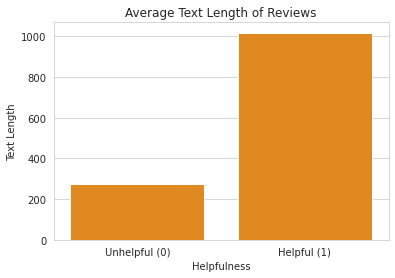

[Text(0, 0, 'Unhelpful (0)'), Text(0, 0, 'Helpful (1)')]

In [0]:
import seaborn as sns
sns.set_style('whitegrid')
ax1 = sns.barplot(x='label', y='avg(rt_length)', data=df3, color='darkorange')
plt.ylabel('Text Length') 
plt.xlabel('Helpfulness')
plt.title('Average Text Length of Reviews')
ax1.set_xticklabels(['Unhelpful (0)','Helpful (1)'])


In [0]:
ramos=df.toPandas()

In [0]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [0]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

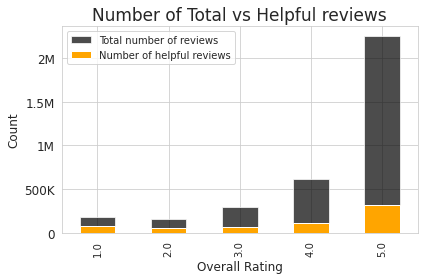

In [0]:
sns.set_style('whitegrid')

plot2 = ramos['overall'].value_counts().sort_index()
ax2 = plot2.plot(kind = 'bar', color = 'black', label = 'Total number of reviews',alpha=.7)

plot3 =helpful['overall'].value_counts().sort_index()
ax2 =plot3.plot(kind = 'bar', color = 'orange', label = 'Number of helpful reviews')

plt.legend()
plt.title('Number of Total vs Helpful reviews', fontsize=17)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.yticks(fontsize=12)

ax2.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
plt.tight_layout()

#Rating Doesn't Matter in deciding if reviews are helpful or not

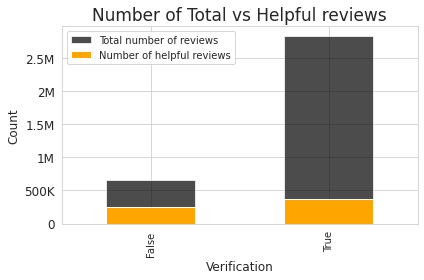

In [0]:
sns.set_style('whitegrid')

plot2 = ramos['verified'].value_counts().sort_index()
ax2 = plot2.plot(kind = 'bar', color = 'black', label = 'Total number of reviews',alpha=.7)

plot3 =helpful['verified'].value_counts().sort_index()
ax2 =plot3.plot(kind = 'bar', color = 'orange', label = 'Number of helpful reviews')

plt.legend()
plt.title('Number of Total vs Helpful reviews', fontsize=17)
plt.xlabel('Verification', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.yticks(fontsize=12)

ax2.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
plt.tight_layout()

#Verification Doesn't Matter in deciding if reviews are helpful or not

In [0]:
# Verified & not verified users - rating distribution

display(df.groupBy('label').pivot('verified').count())

label,false,true
1,255621,370545
0,400043,2461122


In [0]:
display(df.select("label").count())

--------------------------------------------------------------------------- 
 Exception Traceback (most recent call last)
 <command-2742543324325875> in <module> 
 ----> 1 display ( df . select ( "label" ) . count ( ) ) 

 /databricks/python_shell/scripts/PythonShellImpl.py in display (self, input, *args, **kwargs) 
 1225 self . displayHTML ( input . _repr_html_ ( ) ) 
 1226 else : 
 -> 1227 raise Exception ( genericErrorMsg ) 
 1228 
 1229 def displayHTML ( self , html ) : 

 Exception : Cannot call display(<class 'int'>)
 Call help(display) for more info.

In [0]:
import spacy
from textblob import TextBlob
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

In [0]:
xavi['rt_length']

Out[17]: 0 71
1 297
2 8
3 98
4 58
 ... 
3487326 140
3487327 33
3487328 67
3487329 94
3487330 291
Name: rt_length, Length: 3487331, dtype: int32

In [0]:
sns.set_style('whitegrid')
plot2 = notverified.category.value_counts()
ax2 = plot2.plot(kind = 'bar', color = 'black', label = 'No verified purchase',alpha=.7)

plot3 =verified.category.value_counts()
ax2 =plot3.plot(kind = 'bar', color = 'orange', label = 'Verified purchase')

plt.legend()
plt.title('Number of Total vs Helpful reviews', fontsize=17)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)
plt.yticks(fontsize=12)

ax2.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
plt.tight_layout()

In [0]:
xavi['stopword_count'] = xavi["reviewText"].apply(lambda x:count_stopwords(x))

xavi['stopword_count']

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-2742543324325852> in <module> 
 ----> 1 xavi [ 'stopword_count' ] = xavi [ "reviewText" ] . apply ( lambda x : count_stopwords ( x ) ) 
 2 
 3 xavi [ 'stopword_count' ] 

 /databricks/python/lib/python3.8/site-packages/pandas/core/series.py in apply (self, func, convert_dtype, args, **kwds) 
 4211 else : 
 4212 values = self . astype ( object ) . _values
 -> 4213 mapped = lib . map_infer ( values , f , convert = convert_dtype ) 
 4214 
 4215 if len ( mapped ) and isinstance ( mapped [ 0 ] , Series ) : 

 pandas/_libs/lib.pyx in pandas._libs.lib.map_infer () 

 <command-2742543324325852> in <lambda> (x) 
 ----> 1 xavi [ 'stopword_count' ] = xavi [ "reviewText" ] . apply ( lambda x : count_stopwords ( x ) ) 
 2 
 3 xavi [ 'stopword_count' ] 

 <command-2742543324325849> in count_stopwords (text) 
 6 #Count of Stopwords 
 7 def count_stopwords ( text ) : 
 ----> 8 stop_words = set ( stopwords . words ( 'english' ) ) 
 9 word_tokens = word_tokenize ( text ) 
 10 stopwords_x = [ w for w in word_tokens if w in stop_words ] 

 NameError : name 'stopwords' is not defined

In [0]:
xavi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487331 entries, 0 to 3487330
Data columns (total 11 columns):
 # Column Dtype 
--- ------ ----- 
 0 reviewID int64 
 1 overall float64
 2 verified bool 
 3 reviewTime object 
 4 reviewerID object 
 5 asin object 
 6 reviewerName object 
 7 reviewText object 
 8 summary object 
 9 unixReviewTime int32 
 10 label int32 
dtypes: bool(1), float64(1), int32(2), int64(1), object(6)
memory usage: 242.8+ MB

In [0]:
df.show()

df.describe().show()

+--------+-------+--------+-----------+--------------+----------+-----------------+--------------------+--------------------+--------------+-----+
reviewID|overall|verified| reviewTime| reviewerID| asin| reviewerName| reviewText| summary|unixReviewTime|label|
+--------+-------+--------+-----------+--------------+----------+-----------------+--------------------+--------------------+--------------+-----+
 0| 5.0| true|10 17, 2015|A1HP7NVNPFMA4N|0700026657| Ambrosia075|This game is a bi...|but when you do i...| 1445040000| 0|
 1| 4.0| false|07 27, 2015|A1JGAP0185YJI6|0700026657| travis|I played it a whi...|But in spite of t...| 1437955200| 0|
 2| 3.0| true|02 23, 2015|A1YJWEXHQBWK2B|0700026657|Vincent G. Mezera| ok game.| Three Stars| 1424649600| 0|
 3| 2.0| true|02 20, 2015|A2204E1TH211HT|0700026657| Grandma KR|found the game a ...| Two Stars| 1424390400| 0|
 4| 5.0| true|12 25, 2014|A2RF5B5H74JLPE|0700026657| jon|great game, I lov...| love this game| 1419465600| 0|
 5| 4.0| true|11 13, 2014|A11V6ZJ2FVQY1D|0700026657| IBRAHIM ALBADI|i liked a lot som...| Anno 2070| 1415836800| 0|
 6| 1.0| false| 08 2, 2014|A1KXJ1ELZIU05C|0700026657| Creation27|I'm an avid gamer...|Avoid This Game -...| 1406937600| 0|
 7| 5.0| true| 03 3, 2014|A1WK5I4874S3O2|0700026657| WhiteSkull|I bought this gam...|A very good game ...| 1393804800| 0|
 8| 5.0| true|02 21, 2014| AV969NA4CBP10|0700026657| Travis B. Moore|I have played the...|Anno 2070 more li...| 1392940800| 0|
 9| 4.0| true|06 27, 2013|A1EO9BFUHTGWKZ|0700026657| johnnyz3|I liked it and ha...| Pretty fun| 1372291200| 0|
 10| 4.0| true|12 28, 2012|A2M8JTIST6FPZZ|0700026657| Amazon Customer|4 Stars because t...|My boys enjoys th...| 1356652800| 0|
 11| 1.0| false|05 15, 2012|A1LMJ9W8UX1H5B|0700026657| Rob NY|I've bought and p...| SAY NO TO DRM!!| 1337040000| 1|
 12| 5.0| true|08 14, 2011| AN3YYDZAS3O1Y|0700099867| Bob|Loved playing Dir...|A step up from Di...| 1313280000| 1|
 13| 5.0| false|06 28, 2011|A38NXTZUFB1O2K|0700099867| FiSH|I'm not quite fin...| Best in the series!| 1309219200| 0|
 14| 5.0| false|06 18, 2011|A15PIAQT55GNCA|0700099867| Suk W. Yu|lot of people don...|this games is ama...| 1308355200| 0|
 15| 4.0| true|06 14, 2011|A361M14PU2GUEG|0700099867| Angry Ryan|I had Dirt 2 on X...| DIRT 3| 1308009600| 1|
 16| 5.0| false|06 13, 2011|A2LQCBLLJVVR5T|0700099867| Timmiley|This is a must ha...|BEST GRAPHICS OF ...| 1307923200| 1|
 17| 1.0| true|05 18, 2013|A1NQ759X8WPIVV|0700026398| Lynn|I'm sure I would ...| Requires steam| 1368835200| 0|
 18| 1.0| false|01 10, 2013| APFCXOFX0KUPN|0700026398| --|Update June 2013:...| Skip!| 1357776000| 0|
 19| 4.0| false|12 26, 2012|A2GPRA9HHLOC4B|0700026398| Wicasawakan|I will open with ...|Great game with d...| 1356480000| 1|
+--------+-------+--------+-----------+--------------+----------+-----------------+--------------------+--------------------+--------------+-----+
only showing top 20 rows

root
-- reviewID: long (nullable = true)
-- overall: double (nullable = true)
-- verified: boolean (nullable = true)
-- reviewTime: string (nullable = true)
-- reviewerID: string (nullable = true)
-- asin: string (nullable = true)
-- reviewerName: string (nullable = true)
-- reviewText: string (nullable = true)
-- summary: string (nullable = true)
-- unixReviewTime: integer (nullable = true)
-- label: integer (nullable = true)

+-------+-------------------+-----------------+----------+--------------------+-------------------+------------+--------------------+--------------------+--------------------+------------------+
summary| reviewID| overall|reviewTime| reviewerID| asin|reviewerName| reviewText| summary| unixReviewTime| label|
+-------+-------------------+-----------------+----------+--------------------+-------------------+------------+--------------------+--------------------+--------------------+------------------+
 count| 3487331| 3487331| 3487331| 3487331| 3487331| 3487072| 3487331| 3486921| 3487331| 3487331|
 mean|6.357401957140576E8|4.32010153323558

In [0]:
df.columns

In [0]:
# The count of each overall rating

from pyspark.sql.functions import col
df.groupBy("overall").count().orderBy(col("overall").asc()).display()

overall,count
1.0,179046
2.0,153010
3.0,291621
4.0,612575
5.0,2251079


In [0]:
#Lets see if there are any null values present
xavi.isnull().sum()

#Values missing in reviewer name and summary

Out[6]: reviewID 0
overall 0
verified 0
reviewTime 0
reviewerID 0
asin 0
reviewerName 259
reviewText 0
summary 410
unixReviewTime 0
label 0
dtype: int64

In [0]:
# The most common product IDs
df.groupBy("asin").count().orderBy(col("count").desc()).show(10)

+----------+-----+
 asin|count|
+----------+-----+
0007420412|19655|
000711835X|18496|
0007548672|15921|
0007350899| 7890|
0007444117| 7830|
B000YGEVMI| 7356|
0007378033| 6336|
B0015TMHSI| 5846|
006017322X| 5161|
0007384289| 5095|
+----------+-----+
only showing top 10 rows

In [0]:
df.printSchema()

root
-- reviewID: long (nullable = true)
-- overall: double (nullable = true)
-- verified: boolean (nullable = true)
-- reviewTime: string (nullable = true)
-- reviewerID: string (nullable = true)
-- asin: string (nullable = true)
-- reviewerName: string (nullable = true)
-- reviewText: string (nullable = true)
-- summary: string (nullable = true)
-- unixReviewTime: integer (nullable = true)
-- label: integer (nullable = true)

In [0]:
#Dropping NAs
df_na=df.dropna()

In [0]:
df_na

Out[6]: DataFrame[reviewID: bigint, overall: double, verified: boolean, reviewTime: string, reviewerID: string, asin: string, reviewerName: string, reviewText: string, summary: string, unixReviewTime: int, label: int]

In [0]:
#Converting the Date Column into date
#Feature Engineering
from pyspark.sql.functions import to_date, from_unixtime, to_date

df = df.withColumn('date_review', to_date(from_unixtime('unixReviewTime')))

df.show(10)

+--------+-------+--------+-----------+--------------+----------+-----------------+--------------------+--------------------+--------------+-----+-----------+
reviewID|overall|verified| reviewTime| reviewerID| asin| reviewerName| reviewText| summary|unixReviewTime|label|date_review|
+--------+-------+--------+-----------+--------------+----------+-----------------+--------------------+--------------------+--------------+-----+-----------+
 0| 5.0| true|10 17, 2015|A1HP7NVNPFMA4N|0700026657| Ambrosia075|This game is a bi...|but when you do i...| 1445040000| 0| 2015-10-17|
 1| 4.0| false|07 27, 2015|A1JGAP0185YJI6|0700026657| travis|I played it a whi...|But in spite of t...| 1437955200| 0| 2015-07-27|
 2| 3.0| true|02 23, 2015|A1YJWEXHQBWK2B|0700026657|Vincent G. Mezera| ok game.| Three Stars| 1424649600| 0| 2015-02-23|
 3| 2.0| true|02 20, 2015|A2204E1TH211HT|0700026657| Grandma KR|found the game a ...| Two Stars| 1424390400| 0| 2015-02-20|
 4| 5.0| true|12 25, 2014|A2RF5B5H74JLPE|0700026657| jon|great game, I lov...| love this game| 1419465600| 0| 2014-12-25|
 5| 4.0| true|11 13, 2014|A11V6ZJ2FVQY1D|0700026657| IBRAHIM ALBADI|i liked a lot som...| Anno 2070| 1415836800| 0| 2014-11-13|
 6| 1.0| false| 08 2, 2014|A1KXJ1ELZIU05C|0700026657| Creation27|I'm an avid gamer...|Avoid This Game -...| 1406937600| 0| 2014-08-02|
 7| 5.0| true| 03 3, 2014|A1WK5I4874S3O2|0700026657| WhiteSkull|I bought this gam...|A very good game ...| 1393804800| 0| 2014-03-03|
 8| 5.0| true|02 21, 2014| AV969NA4CBP10|0700026657| Travis B. Moore|I have played the...|Anno 2070 more li...| 1392940800| 0| 2014-02-21|
 9| 4.0| true|06 27, 2013|A1EO9BFUHTGWKZ|0700026657| johnnyz3|I liked it and ha...| Pretty fun| 1372291200| 0| 2013-06-27|
+--------+-------+--------+-----------+--------------+----------+-----------------+--------------------+--------------------+--------------+-----+-----------+
only showing top 10 rows

In [0]:
#I am grouping by the date of review to make a nice chart..
df.groupBy('date_review').count().orderBy('count', ascending=True)

Out[10]: DataFrame[date_review: date, count: bigint]

In [0]:
df.createOrReplaceTempView('final_df')

display(spark.sql('''
  SELECT date_review, COUNT(date_review)
  FROM final_df
  GROUP BY date_review
  ORDER BY date_review
'''))



date_review,count(date_review)
1996-09-18,1
1996-11-20,1
1996-12-17,1
1997-03-08,1
1997-04-15,1
1997-04-17,1
1997-05-03,1
1997-05-09,1
1997-06-01,1
1997-06-05,1


In [0]:
# Distribution of the overall ratings

df.createOrReplaceTempView('Messi')

star_rating = spark.sql('''
  SELECT 
    overall AS star_rating, 
    COUNT(*) AS count 
  FROM
    Messi
  GROUP BY
    overall
  ORDER BY
    overall
''')
display(star_rating)


star_rating,count
1.0,179046
2.0,153010
3.0,291621
4.0,612575
5.0,2251079


In [0]:
# We dropped duplicates

print("Before duplication removal: ", df_na.count())
df_distinct = df_na.dropDuplicates(['reviewerID', 'asin'])
print("After duplication removal: ", df_distinct.count())

Before duplication removal: 3486662
After duplication removal: 3198550

In [0]:
#EDA
prediction_df = df.where( ((df.overall == 1) | (df.overall == 5)) \
                                             & df.verified == True )
# This is equivalent to the following Spark SQL command:

#prediction_df = spark.sql("SELECT * FROM amazon_book_reviews WHERE (overall = 1 OR overall = 5) AND verified = TRUE")

display(prediction_df)

reviewID,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,label
0,5.0,true,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, but when you do it's great.",but when you do it's great.,1445040000,0
4,5.0,true,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since its arrived",love this game,1419465600,0
7,5.0,true,"03 3, 2014",A1WK5I4874S3O2,0700026657,WhiteSkull,"I bought this game thinking it would be pretty cool and that i might play it for a week or two and be done. Boy was I wrong! From the moment I finally got the gamed Fired up (the other commentors on this are right, it takes forever and u are forced to create an account) I watched as it booted up I could tell right off the bat that ALOT of thought went into making this game. If you have ever played Sim city, then this game is a must try as you will easily navigate thru it and its multi layers. I have been playing htis now for a month straight, and I am STILL discovering layers of complexity in the game. There are a few things in the game that could used tweaked, but all in all this is a 5 star game.",A very good game balance of skill with depth of choices,1393804800,0
8,5.0,true,"02 21, 2014",AV969NA4CBP10,0700026657,Travis B. Moore,I have played the old anno 1701 AND 1503. this game looks great but is more complex than the previous versions of the game. I found a lot of things lacking such as the sources of power and an inability to store energy with batteries or regenertive fuel cells as buildings in the game need power. Trade is about the same. My main beef with this it requires an internet connection. Other than that it has wonderful artistry and graphics. It is the same as anno 1701 but set in a future world where global warmming as flood the land and resource scarcity has sent human kind to look to the deep ocean for valuable minerals. I recoment the deep ocean expansion or complete if you get this. I found the ai instructor a little corny but other than that the game has some real polish. I wrote my 2 cents worth on suggestions on anno 2070 wiki and you can read 3 pages on that for game ideas I had.,Anno 2070 more like anno 1701,1392940800,0
12,5.0,true,"08 14, 2011",AN3YYDZAS3O1Y,0700099867,Bob,"Loved playing Dirt 2 and I thought the graphics were good. Purchased Dirt 3 as an addition to the other...and the graphics are absolutely ""Gorgeous"" If you liked Dirt or Dirt 2...you are going to love Dirt 3. The game was easier to configure with my Logitech wireless rumblepad...and with my EVGA GTX 580, and all detail set to full on graphics at 1920 x 1080 I get over 100 fps. The game looks good, plays well and is a blast!",A step up from Dirt 2 and that is terrific!,1313280000,1
17,1.0,true,"05 18, 2013",A1NQ759X8WPIVV,0700026398,Lynn,"I'm sure I would love the game, if I could play it, I have loved all the Hitman games thus far. The one star is due to steam. Steam is absolutely beyond annoying and they do NOT help you if you ask them. I found out after I purchased it that windows xp does not support direct X-10. I do have a high end video card but it doesn't make a difference. I recommend that no one purchase any games or other items that require steam. Perhaps then they will fix all the problems or go out of business (my favorite option). I am very good with computers (built mine) so that is not the problem. As always it's a steam issue.",Requires steam,1368835200,0
20,5.0,true,"04 6, 2015",A2LVV3GA8LN557,0700099867,Mike A. Darsch,i like bf games and this works with my wireless xbox 360 controller ( i don't have a xbox i use it for pc games),i like bf games and this works with my wireless xbox ...,1428278400,0
25,1.0,true,"06 30, 2014",A248LSBZT4P38V,0700099867,Joseph R. Kennedy,"I bought this and the key didn't work. It was a gift, and the recipient wasn't able to solve the problem. It might have been a good game, but I never found out becau

In [0]:
#asin (Amazon Standard Identification Number, similar to a SKU) refers to each unique prod
#Lets find the count of the unique products we are dealing with in our data

#We can see that there are 65.5k unique asins
df.select(col('asin')).distinct().count()

Out[15]: 65504

In [0]:
#What percentage of our reviews are verified?
from pyspark.sql.functions import round

display(df.groupBy('verified').count())

#Printing out the value as a percentage
#Can see that 80+% of reviews are verified
percentage_true = df.filter((col('verified') == 'true')).count() / df.count()

print(f'{percentage_true}% of reviews are verified')

verified,count
true,2831667
false,655664


0.811986874776154% of reviews are verified

In [0]:
#Of those reviews that are verified, what do the overall ratings look like? Let's also compare to non verified reviews
import pyspark.sql.functions as f #this seems to be the standard - just call f. to view all available functions
from pyspark.sql.window import Window

verified_overall = df.filter((col('verified') == 'true')).groupBy('overall').count().orderBy('count', ascending=False)

verified_overall = verified_overall.withColumn('Percentage', f.col('count')/f.sum('count').over(Window.partitionBy())).show()

#1.9 of 2.8 million (67.7%) are verified reviews are 5 star

+-------+-------+-------------------+
overall| count| Percentage|
+-------+-------+-------------------+
 5.0|1916529| 0.6768200498151795|
 4.0| 465878|0.16452428904952454|
 3.0| 216707|0.07652983207418104|
 1.0| 124171|0.04385084828124211|
 2.0| 108382|0.03827498077987278|
+-------+-------+-------------------+

In [0]:
#Now lets look at the relationship between our target (label) and overall ratings
#What does the total split look like between helpful (1) and not helpful(0)

#We can see that only ~18% of reviews are considered to be helpful; this is surprising, as I figured it would be much higher
display(df.groupBy('label').count())

helpful = 1-df.filter((col('label') == 0)).count() / df.count()
print(f'{helpful}% of reviews are considered to be helpful')    

label,count
1,626166
0,2861165


0.17955450744423174% of reviews are considered to be helpful

In [0]:
#The data is definitely imbalanced
 
display(df_distinct.groupBy('label').count())

label,count
1,580477
0,2618697


In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import RegexTokenizer, CountVectorizer, StopWordsRemover, IDF, VectorAssembler
from pyspark.ml.tuning import CrossValidator, TrainValidationSplit, ParamGridBuilder
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from nltk.stem.snowball import SnowballStemmer
from pyspark.ml.feature import NGram
from pyspark.sql.functions import array_union
from pyspark.ml.feature import NGram
from pyspark.sql.functions import array_union

In [0]:
#Dropping features that are not required..
drop_list = ['reviewID', 'reviewerID','reviewTime', 'image', 'reviewerName','asin','summary','date_review','overall','unixReviewTime']
df = df_distinct.select([column for column in df_distinct.columns if column not in drop_list])
df.show(5)
print((df.count(), len(df.columns)))

+--------+--------------------+-----+
verified| reviewText|label|
+--------+--------------------+-----+
 true| Very real| 0|
 true| superb| 0|
 true|great product use...| 0|
 true|Love these candle...| 0|
 true|Very satisfied cu...| 0|
+--------+--------------------+-----+
only showing top 5 rows

(3198550, 3)

In [0]:
#Dropping NA vals
#Count remained the same; no missing vals to report on

df.na.drop(subset=['reviewText', 'label','verified']).show(10)

print(df.count())

+--------+-------+--------+-----------+--------------+----------+-----------------+--------------------+--------------------+--------------+-----+
reviewID|overall|verified| reviewTime| reviewerID| asin| reviewerName| reviewText| summary|unixReviewTime|label|
+--------+-------+--------+-----------+--------------+----------+-----------------+--------------------+--------------------+--------------+-----+
 0| 5.0| true|10 17, 2015|A1HP7NVNPFMA4N|0700026657| Ambrosia075|This game is a bi...|but when you do i...| 1445040000| 0|
 1| 4.0| false|07 27, 2015|A1JGAP0185YJI6|0700026657| travis|I played it a whi...|But in spite of t...| 1437955200| 0|
 2| 3.0| true|02 23, 2015|A1YJWEXHQBWK2B|0700026657|Vincent G. Mezera| ok game.| Three Stars| 1424649600| 0|
 3| 2.0| true|02 20, 2015|A2204E1TH211HT|0700026657| Grandma KR|found the game a ...| Two Stars| 1424390400| 0|
 4| 5.0| true|12 25, 2014|A2RF5B5H74JLPE|0700026657| jon|great game, I lov...| love this game| 1419465600| 0|
 5| 4.0| true|11 13, 2014|A11V6ZJ2FVQY1D|0700026657| IBRAHIM ALBADI|i liked a lot som...| Anno 2070| 1415836800| 0|
 6| 1.0| false| 08 2, 2014|A1KXJ1ELZIU05C|0700026657| Creation27|I'm an avid gamer...|Avoid This Game -...| 1406937600| 0|
 7| 5.0| true| 03 3, 2014|A1WK5I4874S3O2|0700026657| WhiteSkull|I bought this gam...|A very good game ...| 1393804800| 0|
 8| 5.0| true|02 21, 2014| AV969NA4CBP10|0700026657| Travis B. Moore|I have played the...|Anno 2070 more li...| 1392940800| 0|
 9| 4.0| true|06 27, 2013|A1EO9BFUHTGWKZ|0700026657| johnnyz3|I liked it and ha...| Pretty fun| 1372291200| 0|
+--------+-------+--------+-----------+--------------+----------+-----------------+--------------------+--------------------+--------------+-----+
only showing top 10 rows

3487331

In [0]:
#Only taking reviewText feature

df = df.select('reviewText', 'label')

df.show(10)

In [0]:
# set seed for reproducibility
(trainingData, testingData) = df.randomSplit([0.8, 0.2], seed = 67)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testingData.count()))

Training Dataset Count: 2557512
Test Dataset Count: 641038

In [0]:
from sparknlp.base import DocumentAssembler, Finisher
from sparknlp.annotator import Tokenizer, Normalizer, StopWordsCleaner, Stemmer

from pyspark.ml import Pipeline
from pyspark.ml.feature import CountVectorizer, HashingTF, IDF, StringIndexer, SQLTransformer, IndexToString, VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier


In [0]:
# convert text column to spark nlp document
document_assembler = DocumentAssembler() \
    .setInputCol("reviewText") \
    .setOutputCol("document")

docs = document_assembler.transform(trainingData)
docs.show()

+--------+--------------------+-----+--------------------+
verified| reviewText|label| document|
+--------+--------------------+-----+--------------------+
 false| Fuzzy Wuzzy's Su...| 0|[{document, 0, 13...|
 false|!!!!!Some spoiler...| 0|[{document, 0, 12...|
 false|" 'Marry, and you...| 0|[{document, 0, 11...|
 false|"'Power Without R...| 0|[{document, 0, 50...|
 false|".....burn, burn,...| 1|[{document, 0, 94...|
 false|"A Pocket Full of...| 1|[{document, 0, 15...|
 false|"A rainbow and a ...| 1|[{document, 0, 43...|
 false|"Aliens vs Predat...| 0|[{document, 0, 82...|
 false|"All it takes som...| 0|[{document, 0, 35...|
 false|"And Then He Kiss...| 0|[{document, 0, 52...|
 false|"At sixteen, Alar...| 1|[{document, 0, 19...|
 false|"Baseball America...| 1|[{document, 0, 23...|
 false|"Bel canto" is de...| 0|[{document, 0, 11...|
 false|"Black Powder War...| 1|[{document, 0, 22...|
 false|"But I couldn't g...| 0|[{document, 0, 20...|
 false|"Civilization wou...| 1|[{document, 0, 17...|
 false|"Communion" beat ...| 1|[{document, 0, 89...|
 false|"Dark Fall: The J...| 0|[{document, 0, 40...|
 false|"Disaster" was a ...| 1|[{document, 0, 13...|
 false|"Disclaimer: I re...| 0|[{document, 0, 41...|
+--------+--------------------+-----+--------------------+
only showing top 20 rows

In [0]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [0]:
pip install -spacy download en

Python interpreter will be restarted.

Usage: 
 pip install [options] <requirement specifier> [package-index-options] ...
 pip install [options] -r <requirements file> [package-index-options] ...
 pip install [options] [-e] <vcs project url> ...
 pip install [options] [-e] <local project path> ...
 pip install [options] <archive url/path> ...

no such option: -m

--------------------------------------------------------------------------- 
 CalledProcessError Traceback (most recent call last)
 <command-4456174847159206> in <module> 
 ----> 1 get_ipython ( ) . run_line_magic ( 'pip' , 'install -m spacy download en' ) 

 /databricks/python/lib/python3.8/site-packages/IPython/core/interactiveshell.py in run_line_magic (self, magic_name, line, _stack_depth) 
 2325 kwargs [ 'local_ns' ] = self . get_local_scope ( stack_depth ) 
 2326 with self . builtin_trap : 
 -> 2327 result = fn ( * args , ** kwargs ) 
 2328 return result
 2329 

 <decorator-gen-109> in pip (self, line) 

 /databricks/python/lib/python3.8/site-packages/IPython/core/magic.py in <lambda> (f, *a, **k) 
 185 # but it's overkill for just that one bit of state. 
 186 def magic_deco ( arg ) : 
 --> 187 call = lambda f , * a , ** k : f ( * a , ** k ) 
 188 
 189 if callable ( arg ) : 

 /databricks/python_shell/dbruntime/CondaMagicOverrides.py in pip (self, line) 
 26 @ line_magic
 27 def pip ( self , line ) : 
 ---> 28 self . condaMagicHandler . runCmd ( "pip" , line ) 
 29 
 30 

 /databricks/python_shell/dbruntime/CondaMagicOverrides.py in runCmd (self, magicCmd, line) 
 47 self . entry_point . restartInterpAfterExecution ( ) 
 48 if parsedResult . rewrittenCommand ( ) : 
 ---> 49 self . executeCondaCommand ( parsedResult ) 
 50 envState . postExecute ( parsedResult ) 
 51 if parsedResult . isMutation ( ) : 

 /databricks/python_shell/dbruntime/CondaMagicOverrides.py in executeCondaCommand (self, result) 
 98 sys . stdout . flush ( ) 
 99 if returncode != 0 : 
 --> 100 raise subprocess . CalledProcessError ( returncode , origCmd ) 
 101 finally : 
 102 end = time . time ( ) 

 CalledProcessError : Command 'pip install -m spacy download en' returned non-zero exit status 2.

In [0]:
import en_core_web_sm
nlp = en_core_web_sm.load()

--------------------------------------------------------------------------- 
 ModuleNotFoundError Traceback (most recent call last)
 <command-4456174847159205> in <module> 
 ----> 1 import en_core_web_sm
 2 nlp = en_core_web_sm . load ( ) 

 /databricks/python_shell/dbruntime/PythonPackageImportsInstrumentation/__init__.py in import_patch (name, globals, locals, fromlist, level) 
 156 # Import the desired module. If you’re seeing this while debugging a failed import, 
 157 # look at preceding stack frames for relevant error information. 
 --> 158 original_result = python_builtin_import ( name , globals , locals , fromlist , level ) 
 159 
 160 is_root_import = thread_local . _nest_level == 1 

 ModuleNotFoundError : No module named 'en_core_web_sm'

In [0]:
tokenizer = RegexTokenizer(inputCol="reviewText", outputCol="words", pattern="\\W")

stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered")


In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover
from pyspark.sql import functions as f

In [0]:
pipeline = Pipeline(stages=[tokenizer,stopwordsRemover])

In [0]:
pipelineFit = pipeline.fit(trainingData)
trainingData = pipelineFit.transform(trainingData)

In [0]:
trainingData.show()

+--------+--------------------+-----+--------------------+--------------------+
verified| reviewText|label| words| filtered|
+--------+--------------------+-----+--------------------+--------------------+
 false| Fuzzy Wuzzy's Su...| 0|[fuzzy, wuzzy, s,...|[fuzzy, wuzzy, su...|
 false|!!!!!Some spoiler...| 0|[some, spoilers, ...|[spoilers, indica...|
 false|" 'Marry, and you...| 0|[marry, and, you,...|[marry, regret, m...|
 false|"'Power Without R...| 0|[power, without, ...|[power, without, ...|
 false|".....burn, burn,...| 1|[burn, burn, burn...|[burn, burn, burn...|
 false|"A Pocket Full of...| 1|[a, pocket, full,...|[pocket, full, ry...|
 false|"A rainbow and a ...| 1|[a, rainbow, and,...|[rainbow, happy, ...|
 false|"Aliens vs Predat...| 0|[aliens, vs, pred...|[aliens, vs, pred...|
 false|"All it takes som...| 0|[all, it, takes, ...|[takes, nights, s...|
 false|"And Then He Kiss...| 0|[and, then, he, k...|[kissed, made, la...|
 false|"At sixteen, Alar...| 1|[at, sixteen, ala...|[sixteen, alaric,...|
 false|"Baseball America...| 1|[baseball, americ...|[baseball, americ...|
 false|"Bel canto" is de...| 0|[bel, canto, is, ...|[bel, canto, defi...|
 false|"Black Powder War...| 1|[black, powder, w...|[black, powder, w...|
 false|"But I couldn't g...| 0|[but, i, couldn, ...|[couldn, get, ima...|
 false|"Civilization wou...| 1|[civilization, wo...|[civilization, wo...|
 false|"Communion" beat ...| 1|[communion, beat,...|[communion, beat,...|
 false|"Dark Fall: The J...| 0|[dark, fall, the,...|[dark, fall, jour...|
 false|"Disaster" was a ...| 1|[disaster, was, a...|[disaster, disapp...|
 false|"Disclaimer: I re...| 0|[disclaimer, i, r...|[disclaimer, rece...|
+--------+--------------------+-----+--------------------+--------------------+
only showing top 20 rows

In [0]:
counts = trainingData.select(f.explode('filtered').alias('col')).groupBy('col').count().sort(f.desc('count')).collect()
display(counts)

col,count
book,958195
one,922557
game,769153
great,717006
like,709649
good,583828
read,515726
well,513547
time,458672
get,440977


In [0]:
def pos_tag(x):
    import nltk
    return nltk.pos_tag([x])pos_word = filtered_data.map(pos_tag)
print pos_word.collect()

In [0]:
display(tokens.groupBy('words').count())

words count List(with, wings, like, eagles, provides, the, reader, with, a, birds, eye, view, of, the, trends, which, culminated, in, the, battle, of, britain, tracing, the, development, of, the, raf, and, luftwaffe, in, the, 1930s, the, story, progresses, seamlessly, through, the, competing, demands, on, fighter, command, presented, by, the, battle, of, france, and, the, need, to, maintain, sufficient, strength, to, defend, britain, from, the, onslaught, to, come, the, tug, of, war, between, bomber, and, fighter, supporters, shaped, the, air, forces, of, their, day, and, altered, the, outcome, of, the, war, design, details, of, the, aircraft, make, for, interesting, reading, the, battle, of, britain, itself, is, presented, as, a, mighty, struggle, of, men, and, machines, which, changed, the, world, raf, pilots, are, depicted, as, the, brave, few, who, were, often, thrown, into, combat, with, minimal, training, and, from, which, they, would, have, little, rest, on, the, outcome, of, the, battle, rode, operation, sea, lion, the, german, invasion, of, britain, the, luftwaffe, s, failure, to, achieve, air, superiority, compelled, the, delay, and, ultimate, cancellation, of, sea, lion, the, explanation, of, the, role, the, british, defense, played, in, deflecting, the, german, offensive, from, england, to, russia, shows, the, crucial, role, of, the, battle, not, only, to, britain, but, to, the, world, even, a, mistake, may, have, turned, the, battle, just, when, the, luftwaffe, seemed, to, be, on, the, verge, of, destroying, fighter, command, a, wayward, bomb, attack, on, london, was, followed, by, a, retaliation, raid, on, berlin, this, deflection, of, resources, toward, cities, and, away, from, air, bases, may, have, saved, the, raf, to, fight, another, day, author, michael, korda, includes, interesting, studies, of, the, characters, heroic, and, maligned, who, played, major, roles, in, this, drama, i, was, particularly, struck, by, the, study, of, churchill, who, had, to, be, restrained, by, other, politicians, when, he, wanted, to, commit, the, heart, of, fighter, command, to, the, failing, defense, of, france, even, he, had, his, moments, of, delusion, goering, is, depicted, as, the, disappointed, blusterer, who, failed, to, deliver, on, his, promise, to, destroy, fighter, command, and, provide, the, cover, for, sea, lion, a, little, known, figure, sir, hugh, dowding, is, shown, as, skillfully, guiding, the, defense, while, his, retirement, age, was, gradually, deferred, until, after, victory, was, assured, even, stanley, baldwin, and, neville, chamberlin, who, are, usually, derided, as, appeasers, are, recognized, for, their, roles, in, laying, the, groundwork, for, the, development, of, the, raf, which, is, the, collective, hero, of, the, story, perhaps, the, most, humorous, story, is, one, that, dealt, with, radar, much, of, british, success, depended, on, its, development, during, the, battle, aircraft, mounted, radar, was, developed, which, gave, the, british, an, advantage, in, finding, the, enemy, during, night, attacks, not, wanting, to, disclose, the, source, of, their, new, found, success, the, story, was, leaked, that, the, pilots, were, improving, their, night, vision, by, eating, raw, carrots, the, next, time, you, think, of, eating, carrots, for, good, eye, health, remember, that, the, theory, is, grounded, not, in, scientific, research, but, in, counter, intelligence, with, wings, like, eagles, is, an, informative, narration, of, one, of, the, most, significant, forces, and, battles, of, world, war, ii, as, such, it, is, a, valuable, addition, to, any, world, war, ii, library) 1 List(i, never, dreamed, that, a, tv, game, could, be, so, much, fun, or, that, i, would, want, to, have, one, to, play, i, wish, my, dad, had, lived, long, enough, to, find, that, he, could, still, bowl, even, thought, he, couldn, t, walk, any, longer, i, m, trying, to, get, my, mom, one, there, are, so, many, sports, games, which, excl

In [0]:
iniesta=tokens.toPandas()

In [0]:
import spacy
from textblob import TextBlob

In [0]:
iniesta['words']=iniesta['words'].apply(lambda x:TextBlob(x).sentiment.polarity)

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-4456174847159174> in <module> 
 ----> 1 iniesta [ 'words' ] = iniesta [ 'words' ] . apply ( lambda x : TextBlob ( x ) . sentiment . polarity ) 

 /databricks/python/lib/python3.8/site-packages/pandas/core/series.py in apply (self, func, convert_dtype, args, **kwds) 
 4211 else : 
 4212 values = self . astype ( object ) . _values
 -> 4213 mapped = lib . map_infer ( values , f , convert = convert_dtype ) 
 4214 
 4215 if len ( mapped ) and isinstance ( mapped [ 0 ] , Series ) : 

 pandas/_libs/lib.pyx in pandas._libs.lib.map_infer () 

 <command-4456174847159174> in <lambda> (x) 
 ----> 1 iniesta [ 'words' ] = iniesta [ 'words' ] . apply ( lambda x : TextBlob ( x ) . sentiment . polarity ) 

 /databricks/python/lib/python3.8/site-packages/textblob/blob.py in __init__ (self, text, tokenizer, pos_tagger, np_extractor, analyzer, parser, classifier, clean_html) 
 367 parser=None, classifier=None, clean_html=False):
 368 if not isinstance ( text , basestring ) : 
 --> 369 raise TypeError('The `text` argument passed to `__init__(text)` '
 370 'must be a string, not {0}'.format(type(text)))
 371 if clean_html : 

 TypeError : The `text` argument passed to `__init__(text)` must be a string, not <class 'numpy.ndarray'>

In [0]:
stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered")

In [0]:
# We'll tokenize the text using a simple RegexTokenizer
tokenizer = RegexTokenizer(inputCol="reviewText", outputCol="words", pattern="\\W")

# Remove standard Stopwords
stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered")

# Vectorize the sentences using simple BOW method
tf = CountVectorizer(inputCol="filtered", outputCol="rawFeatures", vocabSize=2000, minTF=6, maxDF=0.60)

# Generate Inverse Document Frequency weighting
idf = IDF(inputCol="rawFeatures", outputCol="idfFeatures", minDocFreq=100)

# Combine all features into one final "features" column
assembler = VectorAssembler(inputCols=["verified", "overall", "idfFeatures"], outputCol="features")

w={0: 1, 1: 1000}

# Machine Learning Algorithm
ml_alg  = LogisticRegression(maxIter=20, regParam=0.7, elasticNetParam=0.1, weightCol= w , featuresCol = 'features', labelCol='label')

pipeline = Pipeline(stages=[tokenizer, stopwordsRemover, tf, idf, assembler, ml_alg])

paramGrid = ParamGridBuilder() \
    .addGrid(ml_alg.regParam, [0.3, 0.5, 0.7]) \
    .addGrid(ml_alg.elasticNetParam, [0.0]) \
    .addGrid(tf.minTF, [1, 100, 1000]) \
    .addGrid(tf.vocabSize, [500, 1000, 2500, 5000]) \
    .build()


Exception ignored in: <function JavaWrapper.__del__ at 0x7f388dc369d0>
Traceback (most recent call last):
 File "/databricks/spark/python/pyspark/ml/wrapper.py", line 39, in __del__
 if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'LogisticRegression' object has no attribute '_java_obj'
Exception ignored in: <function JavaWrapper.__del__ at 0x7f388dc369d0>
Traceback (most recent call last):
 File "/databricks/spark/python/pyspark/ml/wrapper.py", line 39, in __del__
 if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'LogisticRegression' object has no attribute '_java_obj'

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 /databricks/spark/python/pyspark/ml/param/__init__.py in _set (self, **kwargs) 
 463 try : 
 --> 464 value = p . typeConverter ( value ) 
 465 except TypeError as e : 

 /databricks/spark/python/pyspark/ml/param/__init__.py in toString (value) 
 212 else : 
 --> 213 raise TypeError ( "Could not convert %s to string type" % type ( value ) ) 
 214 

 TypeError : Could not convert <class 'dict'> to string type

During handling of the above exception, another exception occurred:

 TypeError Traceback (most recent call last)
 <command-4456174847154757> in <module> 
 17 
 18 # Machine Learning Algorithm 
 ---> 19 ml_alg = LogisticRegression ( maxIter = 20 , regParam = 0.7 , elasticNetParam = 0.1 , weightCol = w , featuresCol = 'features' , labelCol = 'label' ) 
 20 
 21 pipeline = Pipeline ( stages = [ tokenizer , stopwordsRemover , tf , idf , assembler , ml_alg ] ) 

 /databricks/spark/python/pyspark/__init__.py in wrapper (self, *args, **kwargs) 
 112 raise TypeError ( "Method %s forces keyword arguments." % func . __name__ ) 
 113 self . _input_kwargs = kwargs
 --> 114 return func ( self , ** kwargs ) 
 115 return wrapper
 116 

 /databricks/spark/python/pyspark/ml/classification.py in __init__ (self, featuresCol, labelCol, predictionCol, maxIter, regParam, elasticNetParam, tol, fitIntercept, threshold, thresholds, probabilityCol, rawPredictionCol, standardization, weightCol, aggregationDepth, family, lowerBoundsOnCoefficients, upperBoundsOnCoefficients, lowerBoundsOnIntercepts, upperBoundsOnIntercepts, maxBlockSizeInMB) 
 1068 "org.apache.spark.ml.classification.LogisticRegression", self.uid)
 1069 kwargs = self . _input_kwargs
 -> 1070 self . setParams ( ** kwargs ) 
 1071 self . _checkThresholdConsistency ( ) 
 1072 

 /databricks/spark/python/pyspark/__init__.py in wrapper (self, *args, **kwargs) 
 112 raise TypeError ( "Method %s forces keyword arguments." % func . __name__ ) 
 113 self . _input_kwargs = kwargs
 --> 114 return func ( self , ** kwargs ) 
 115 return wrapper
 116 

 /databricks/spark/python/pyspark/ml/classification.py in setParams (self, featuresCol, labelCol, predictionCol, maxIter, regParam, elasticNetParam, tol, fitIntercept, threshold, thresholds, probabilityCol, rawPredictionCol, standardization, weightCol, aggregationDepth, family, lowerBoundsOnCoefficients, upperBoundsOnCoefficients, lowerBoundsOnIntercepts, upperBoundsOnIntercepts, maxBlockSizeInMB) 
 1094 """
 1095 kwargs = self . _input_kwargs
 -> 1096 self . _set ( ** kwargs ) 
 1097 self . _checkThresholdConsistency ( ) 
 1098 return self

 /databricks/spark/python/pyspark/ml/param/__init__.py in _set (self, **kwargs) 
 464 value = p . typeConverter ( value ) 
 465 except TypeError as e : 
 --> 466 raise TypeError ( 'Invalid param value given for param "%s". %s' % ( p . name , e ) ) 
 467 self . _paramMap [ p ] = value
 468 return self

 TypeError : Invalid param value given for param "weightCol". Could not convert <class 'dict'> to string type

In [0]:
pipelineFit = pipeline.fit(trainingData)

In [0]:
#Downloading & Initializing the Unviversal Sentence Encoder + Importing relevant libraries
import sparknlp
from sparknlp.annotator import *
from sparknlp.common import *
from sparknlp.base import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import CountVectorizer, HashingTF, IDF, OneHotEncoder, StringIndexer, VectorAssembler, SQLTransformer
from pyspark.sql.functions import udf, explode
import pandas as pd


useEmbeddings = UniversalSentenceEncoder.pretrained()\
      .setInputCols("document")\
      .setOutputCol("use_embeddings")


tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][OK!]

In [0]:
#Creating the pipeline
document_assembler = DocumentAssembler() \
      .setInputCol("reviewText") \
      .setOutputCol("document")

loaded_useEmbeddings = UniversalSentenceEncoder.load('/root/cache_pretrained/tfhub_use_en_2.4.0_2.4_1587136330099')\
      .setInputCols("document")\
      .setOutputCol("use_embeddings")

embeddings_finisher = EmbeddingsFinisher() \
      .setInputCols(["use_embeddings"]) \
      .setOutputCols(["finished_use_embeddings"]) \
      .setOutputAsVector(True)\
      .setCleanAnnotations(False)

#label_stringIdx = StringIndexer(inputCol = "category", outputCol = "label")

use_pipeline = Pipeline(
      stages=[
        document_assembler,
        loaded_useEmbeddings,
        embeddings_finisher])

use_df_model = use_pipeline.fit(trainingData)

In [0]:
use_df_train = use_df_model.transform(trainingData)

In [0]:
#Adding in a features column based on embeddings
use_df_train= use_df_train.withColumn("features", explode(use_df_train.finished_use_embeddings))

In [0]:
#Transforming test data
use_df_test = use_df_model.transform(testingData)

use_df_test= use_df_test.withColumn("features", explode(use_df_test.finished_use_embeddings))

In [0]:
#Logistic Regression 
import mlflow
import mlflow.spark
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, TrainValidationSplit, ParamGridBuilder

#Let's start off with a Logistic Regression model
lr = LogisticRegression(elasticNetParam=0.0)

#Define our evaluator
evaluator = BinaryClassificationEvaluator(labelCol='label', metricName='areaUnderROC')

#Define a hyperparameter search space
lr_paramGrid = ParamGridBuilder() \
  .addGrid(lr.regParam, [0.0, 0.3, 0.5, 0.7]) \
  .addGrid(lr.maxIter, [10,25,50,75,100]) \
  .build()


lr_grid = CrossValidator(estimator=lr, 
                         estimatorParamMaps=lr_paramGrid,
                         evaluator=evaluator,
                         numFolds=5)
                             

# Run cross-validation, and choose the best set of parameters.
with mlflow.start_run():
  lr_grid_model = lr_grid.fit(use_df_train) #Running cv on the training dataset; will return the best model it found
  
  #Evaluate the best model's performance on the test set and log the results
  #test_metric = evaluator.evaluate(lr_grid_model.transform(use_df_test))
  #mlflow.log_metric('test_' + evaluator.getMetricName(), test_metric)
  
  #Log the best model
  mlflow.spark.log_model(spark_model=lr_grid_model.bestModel, artifact_path='best-model')
  
  


MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.

In [0]:
# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier example
trainingSummary = lrModel.summary

print("Training Accuracy:  " + str(trainingSummary.accuracy))
print("Training Precision: " + str(trainingSummary.precisionByLabel))
print("Training Recall:    " + str(trainingSummary.recallByLabel))
print("Training FMeasure:  " + str(trainingSummary.fMeasureByLabel()))
print("Training AUC:       " + str(trainingSummary.areaUnderROC))

In [0]:
# Fit the pipeline to testing

testingDataTransform = pipelineFit.transform(testingData)
testingDataTransform.show(5)

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

predictions = lrModel.transform(testingDataTransform)
predictions.show(5)

evaluator = BinaryClassificationEvaluator(metricName="areaUnderROC")
print('Test Area Under ROC', evaluator.evaluate(predictions))

In [0]:
#predictions = lrModel.transform(use_df_test)

predictions = lr_grid_model.transform(use_df_test)

predictions.filter(predictions['prediction'] == 0) \
    .select("reviewText","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30) #***Run all, should work now***

#Now lets prep our results to view in classification report
df_pandas = predictions.select('reviewText','label','prediction').toPandas()

df_pandas.head()

In [0]:
from sklearn.metrics import f1_score
print(classification_report(df_pandas.label, df_pandas.prediction))
print(f1_score(df_pandas.label, df_pandas.prediction))

In [0]:
# Load in the tables
test_df = spark.sql("select * from default.reviews_holdout")
test_df.show(5)
print((test_df.count(), len(test_df.columns)))

+--------+-------+--------+-----------+--------------+----------+----------------+--------------------+--------------------+--------------+
reviewID|overall|verified| reviewTime| reviewerID| asin| reviewerName| reviewText| summary|unixReviewTime|
+--------+-------+--------+-----------+--------------+----------+----------------+--------------------+--------------------+--------------+
67000000| 3.0| true|05 16, 2012|A3IXM075VM1P9T|B007JYB3O2| nachtik|I would say these...| average reading| 1337126400|
67000001| 5.0| true|12 25, 2012|A3LGZ7A3WSV3JJ| 985719745| MSP|WOW, DROPPIN DIME...|WOW.................| 1356393600|
67000002| 5.0| true|09 18, 2012|A3BF5G7CJNIAG0|B002KXH7PQ| C. S. DeMore|You'll love the p...|Another Buggy Bar...| 1347926400|
67000003| 5.0| false|07 27, 2015|A2W41RTHSHYC4Q|B011LXVWRO| Light|For the majority ...|This is a complet...| 1437955200|
67000004| 5.0| false|03 29, 2003| ACTBQZV1CJ9E8|9706061681|Richard Eastwood|MI MEJOR AMIGO..Q...|LE ACABA DE SUCED...| 1048896000|
+--------+-------+--------+-----------+--------------+----------+----------------+--------------------+--------------------+--------------+
only showing top 5 rows

(304984, 10)

In [0]:
test_df_Transform = pipelineFit.transform(test_df)
test_df_Transform.show(5)

+--------+-------+--------+-----------+--------------+----------+----------------+--------------------+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
reviewID|overall|verified| reviewTime| reviewerID| asin| reviewerName| reviewText| summary|unixReviewTime| words| filtered| rawFeatures| idfFeatures| features| rawPrediction| probability|prediction|
+--------+-------+--------+-----------+--------------+----------+----------------+--------------------+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
67000000| 3.0| true|05 16, 2012|A3IXM075VM1P9T|B007JYB3O2| nachtik|I would say these...| average reading| 1337126400|[i, would, say, t...|[say, 5, regular,...|(2000,[0,6,13,30,...|(2000,[0,6,13,30,...|(2002,[0,1,2,8,15...|[1.53898268136029...|[0.82331678836045...| 0.0|
67000001| 5.0| true|12 25, 2012|A3LGZ7A3WSV3JJ| 985719745| MSP|WOW, DROPPIN DIME...|WOW.................| 1356393600|[wow, droppin, di...|[wow, droppin, di...|(2000,[0,1,5,10,2...|(2000,[0,1,5,10,2...|(2002,[0,1,2,3,7,...|[1.44767896409304...|[0.80964096726196...| 0.0|
67000002| 5.0| true|09 18, 2012|A3BF5G7CJNIAG0|B002KXH7PQ| C. S. DeMore|You'll love the p...|Another Buggy Bar...| 1347926400|[you, ll, love, t...|[ll, love, patter...|(2000,[0,1,3,9,10...|(2000,[0,1,3,9,10...|(2002,[0,1,2,3,5,...|[2.09970543802451...|[0.89087454564336...| 0.0|
67000003| 5.0| false|07 27, 2015|A2W41RTHSHYC4Q|B011LXVWRO| Light|For the majority ...|This is a complet...| 1437955200|[for, the, majori...|[majority, person...|(2000,[0,9,15,20,...|(2000,[0,9,15,20,...|(2002,[1,2,11,17,...|[0.48613529627360...|[0.61919558524854...| 0.0|
67000004| 5.0| false|03 29, 2003| ACTBQZV1CJ9E8|9706061681|Richard Eastwood|MI MEJOR AMIGO..Q...|LE ACABA DE SUCED...| 1048896000|[mi, mejor, amigo...|[mi, mejor, amigo...|(2000,[1156,1504,...|(2000,[1156,1504,...|(2002,[1,1158,150...|[1.84028928880630...|[0.86298291750909...| 0.0|
+--------+-------+--------+-----------+--------------+----------+----------------+--------------------+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
only showing top 5 rows

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

probelement=udf(lambda v:float(v[1]),FloatType())
submission_data = test_df_Transform.select('reviewID', probelement('probability')).withColumnRenamed('<lambda>(probability)', 'label')

In [0]:
display(submission_data.select('reviewID', 'label'))

reviewID,label
67000000,0.17668322
67000001,0.19035903
67000002,0.10912546
67000003,0.38080442
67000004,0.13701709
67000005,0.1734149
67000006,0.35426405
67000007,0.18368913
67000008,0.18946896
67000009,0.23097423


In [0]:
paramGrid = ParamGridBuilder() \
    .addGrid(ml_alg.setMaxDepth, [100, 200, 300]) \
    .addGrid(ml_alg., [0.0]) \
    .addGrid(tf.minTF, [1, 100, 1000]) \
    .addGrid(tf.vocabSize, [500, 1000, 2500, 5000]) \
    .build()


In [0]:
ngram = NGram(n = 2, inputCol="reviewWordCleaned", outputCol="reviewBigrams")
prediction_tfidf_hash = ngram.transform(prediction_tfidf_hash)

prediction_tfidf_hash = prediction_tfidf_hash.withColumn("reviewNgrams", \
                                                         array_union(prediction_tfidf_hash.reviewWordCleaned, \
                                                                     prediction_tfidf_hash.reviewBigrams))

# Getting tf-idf values for 1-2grams

from pyspark.ml.feature import HashingTF, IDF

hashtf = HashingTF(numFeatures=2**12, inputCol="reviewNgrams", outputCol='TF')
tf = hashtf.transform(prediction_tfidf_hash)
idf = IDF(minDocFreq=3, inputCol="TF", outputCol="TF-IDF")
idfModel = idf.fit(tf)
prediction_tfidf_hash = idfModel.transform(tf)

